In [ ]:
# -*- coding: utf-8 -*-
import torch
import torchvision

"""Initialize the training and testing parameters."""

n_epochs = 10
batch_size_train = 64
batch_size_test = 64
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

"""Downloading the MNIST dataset"""

data_dir = '/content/drive/MyDrive/DL_CW3/CIFAR10_data/';

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10(data_dir, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10(data_dir, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

example_data.shape


Extracting /content/drive/MyDrive/DL_CW3/CIFAR10_data/cifar-10-python.tar.gz to /content/drive/MyDrive/DL_CW3/CIFAR10_data/
Files already downloaded and verified


torch.Size([64, 3, 32, 32])

In [ ]:
pip install torch

In [ ]:
pip install torchvision

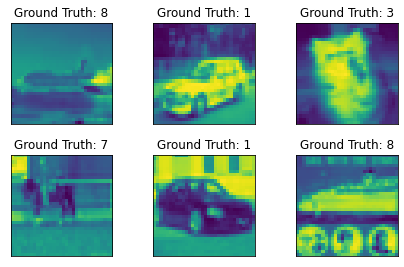

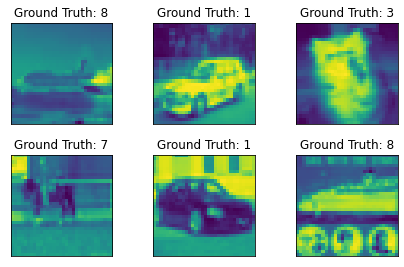

In [ ]:
"""Visualizing some of the ground truth image."""
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='viridis', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig


In [ ]:
"""### vgg16"""

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchvision.models import models
import torchvision.models as models
model = models.vgg16()

"""Initializing model with output for 10 classes and converting model to accept """
model = models.vgg16()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model=model.cuda()

optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
test_acc1 = []

criterion=nn.CrossEntropyLoss()

"""Training model function"""

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data=data.cuda()
    target=target.cuda()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(model.state_dict(), '/vgg16model.pth')
      torch.save(optimizer.state_dict(), '/vgg16_optimizer.pth')

"""Testing model function"""

def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data=data.cuda()
      target=target.cuda()
      output = model(data)
      test_loss += criterion(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_acc = 100 * correct / len(test_loader.dataset)
  test_acc1.append(test_acc)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


In [ ]:
"""Training and testing results at each epoch"""

epochs=[]
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()
  epochs.append(epoch)


Train Epoch: 1 [0/50000 (0%)]	Loss: 6.904457
Train Epoch: 1 [640/50000 (1%)]	Loss: 6.781973
Train Epoch: 1 [1280/50000 (3%)]	Loss: 4.838662
Train Epoch: 1 [1920/50000 (4%)]	Loss: 3.315676
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.494271
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.415952
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.417992
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2.335057
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.472333
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.436705
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.510880
Train Epoch: 1 [7040/50000 (14%)]	Loss: 2.437054
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.432604
Train Epoch: 1 [8320/50000 (17%)]	Loss: 2.345005
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.348737
Train Epoch: 1 [9600/50000 (19%)]	Loss: 2.415561
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.407962
Train Epoch: 1 [10880/50000 (22%)]	Loss: 2.315457
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.354333
Train Epoch: 1 [12160/50000 (24%)]	Loss: 2.377112
Train Epoch: 1 [12800/50000 

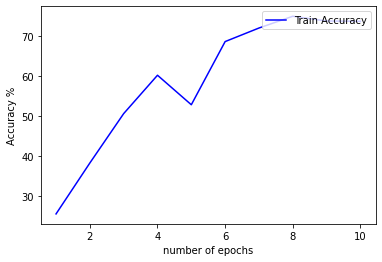

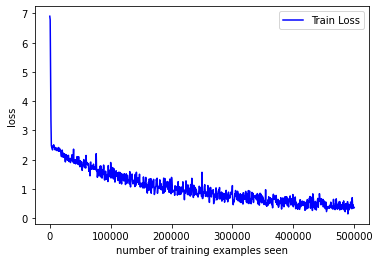

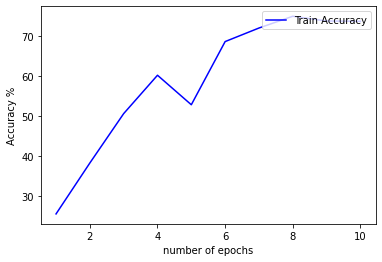

In [ ]:
"""Ploting loss curve """

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('loss')
fig

import matplotlib.pyplot as plt

"""Plotting accuracy curve"""

fig = plt.figure()
plt.plot(epochs, test_acc1, color='blue')
plt.legend(['Train Accuracy'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy %')
fig

In [ ]:
"""Visualizing predicted data"""
with torch.no_grad():
  example_data = example_data.cuda()
  output = model(example_data)

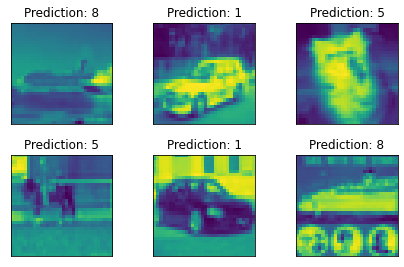

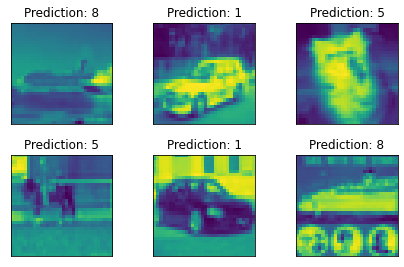

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='viridis', interpolation='none')
  plt.title("Prediction: {}".format(
   output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig